In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

## Reading in Data 

In [70]:
train = pd.read_csv('~/Desktop/Redback/train_test_data/train.csv')
test = pd.read_csv('~/Desktop/Redback/train_test_data/test.csv')
remove_cols = ['Unnamed: 0'] 
train = train.drop(remove_cols, axis=1)
test = test.drop(remove_cols, axis=1)

In [71]:
train.head()

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,43914,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,...,0.948846,0.322634,1.654680,-1.664843,-1.170158,-1.054219,1.388344,-0.019542,0.373114,-1.278439
1,41256,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,...,-1.278742,0.854476,0.118775,0.265861,-1.541565,1.354502,0.884019,1.675101,-0.908377,0.292293
2,40647,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,...,0.488404,-0.286708,-1.196300,1.468756,-1.107191,-1.273721,1.703593,1.290507,0.883771,1.840896
3,39945,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,...,-1.515706,-0.607310,-1.353579,-0.435863,1.464349,1.375929,-1.157524,0.205979,-0.686924,1.726430
4,40476,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,...,0.456738,1.374368,0.426107,1.099293,1.109631,1.476217,0.307232,0.905936,1.401298,-0.505198


In [72]:
test.head()

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,41301,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
1,41202,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
2,41136,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
3,42048,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
4,41922,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088


I wanted to search over all 2^p possible subsets of p covariates to get the best subset selection however since p = 33, this was not compuationally feasible. 

In [73]:
y_train = train.iloc[:, train.columns == "LapTime_max"]
X_train = train.iloc[:, train.columns != "LapTime_max"]
y_test = test.iloc[:, test.columns == "LapTime_max"]
X_test = test.iloc[:, test.columns != "LapTime_max"]

## LASSO 

In [ ]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train, np.ravel(y_train)) # the np.ravel is a necessary detail for compatibility 
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 3.6653263589356353


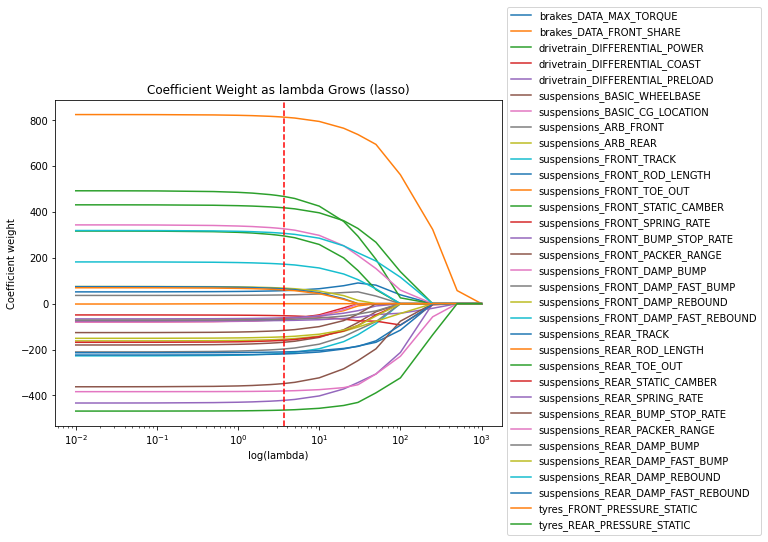

In [ ]:
col_list = X_train.columns

y_train_arr = np.array(y_train)
X_train_arr = np.array(X_train)

lambdas = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 3, 3.66, 5, 10, 20, 30, 50, 100, 250, 500, 1000]
lasso_coefs = []
for l in lambdas:
    lasso = Lasso(alpha = l, fit_intercept = True)
    lasso.fit(X_train_arr, y_train_arr)
    lasso_coefs.append(lasso.coef_)

# make sure that the coefs(weights) is an array
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize = (8, 6))
for col in range(lasso_coefs.shape[1]):
    plt.plot(lambdas, lasso_coefs[:,col], label = col_list[col])

# scale x axis to log of lambda 
plt.xscale('log') 

# legend, title, axes labels 
plt.legend(bbox_to_anchor = (1, 1.3))
plt.title('Coefficient Weight as lambda Grows (lasso)')
plt.ylabel('Coefficient weight')
plt.xlabel('log(lambda)')
plt.axvline(3.6653263589356353, color = "red", linestyle = '--')
plt.show()

In [ ]:
pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train.columns)

,0
brakes_DATA_MAX_TORQUE,56.912
brakes_DATA_FRONT_SHARE,-64.974
drivetrain_DIFFERENTIAL_POWER,295.482
drivetrain_DIFFERENTIAL_COAST,-67.880
drivetrain_DIFFERENTIAL_PRELOAD,-421.547
suspensions_BASIC_WHEELBASE,-168.176
suspensions_BASIC_CG_LOCATION,-69.793
suspensions_ARB_FRONT,38.294
suspensions_ARB_REAR,67.898
suspensions_FRONT_TRACK,-216.159


According to LASSO, the only insignificant variable is suspensions_REAR_ROD_LENGTH 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(10, shuffle = True, random_state = 1) 

score_lasso = cross_val_score(lasso_optimal, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')

In [ ]:
print("RMSE of LASSO Regression =", np.sqrt(-1*np.mean(score_lasso)))

RMSE of LASSO Regression = 2315.751903342085


In [ ]:
X_test

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
1,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
2,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
3,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
4,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
393,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
394,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
395,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029


## Ridge 

In [ ]:
X_train = X_train.iloc[:, X_train.columns != "suspensions_REAR_ROD_LENGTH"]
X_test = X_test.iloc[:, X_test.columns != "suspensions_REAR_ROD_LENGTH"]

In [ ]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [ ]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 16.537180713632846


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=16.537180713632846)

In [ ]:
kf=KFold(10, shuffle=True, random_state=1) 
score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 1898.8365338592987


In [ ]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred)*100)

34.44007007246477


## Model Performance comparison 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross validator
kf=KFold(10, shuffle = True, random_state = 1) 

# Methods
columns = ['CV RMSE']
rows = ['Ridge','Lasso']

regressions = [ridge, lasso_optimal]
results = pd.DataFrame(0.0, columns = columns, index = rows) # initialising a dataframe to hold the results

methods = {k: v for k, v in zip(rows, regressions)}

keys = ['Ridge','Lasso']
for key in keys:
    scores = cross_val_score(methods[key], X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
    print('scores for', key, ' : ', scores) 
    results.loc[key] = np.sqrt(-1*np.mean(scores)) 
    
results.round(3)

scores for Ridge  :  [-1335189.54052878 -2810743.82889207 -1876178.71831309 -2829553.58019856
 -9409364.80036462 -2383840.08110076 -1972344.40330677 -3259482.40187808
 -6533843.98029421 -3645260.488311  ]
scores for Lasso  :  [ -2243595.38389415  -2947332.71967667  -3502214.02114081
  -3463703.29350858 -12883528.73212344  -3133125.31148096
  -2454268.31142928  -5021800.38461538  -8643764.11613245
  -9333736.50432319]


,CV RMSE
Ridge,1898.837
Lasso,2315.752


Using LASSO to select best features and then running ridge on selected features resulted in lower RMSE. 

I think if we had some interaction terms we would be able to improve model performance. Let's try by adding some in

## Feature Engineering 

### Data Processing again

In [4]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

input_params = df_recent.iloc[:, -33:]

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

y_train = train.iloc[:, train.columns == "LapTime_max"]
X_train = train.iloc[:, -33:]
y_test = test.iloc[:, test.columns == "LapTime_max"]
X_test = test.iloc[:, -33:]

In [5]:
# polynomial features degree 2
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

X_train_poly = poly.fit_transform(X_train)
poly_col_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, columns = poly_col_names) 
inplace = True
X_train_poly.columns = X_train_poly.columns.str.replace(',','_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

# test set
X_test_poly = poly.fit_transform(X_test)
poly_col_names = poly.get_feature_names(input_features = X_test.columns)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = poly_col_names) 

X_test_poly.columns = X_test_poly.columns.str.replace(',','_')
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')

<ipython-input-5-9126a56d32eb>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')
<ipython-input-5-9126a56d32eb>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')


In [33]:
# scaling
mu = X_train_poly.mean() # mean for each feature
sigma = X_train_poly.std() # std for each feature

X_train_poly_scaled = (X_train_poly - mu)/sigma
X_test_poly_scaled = (X_test_poly - mu)/sigma

### Lasso (with poly)

In [86]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train_poly_scaled, np.ravel(y_train)) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362807.3975483179, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352102.3994885683, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305545.89947366714, tolerance: 302450.45218056673
  model = cd_fast.enet_coordinate

LassoCV(cv=5)

In [87]:
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 0.6687788771122571


In [88]:
lasso_features = pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train_poly_scaled.columns)

In [89]:
X_train_poly_scaled

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_DAMP_REBOUND_2,suspensions_REAR_DAMP_REBOUND suspensions_REAR_DAMP_FAST_REBOUND,suspensions_REAR_DAMP_REBOUND tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_REBOUND tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND_2,suspensions_REAR_DAMP_FAST_REBOUND tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND tyres_REAR_PRESSURE_STATIC,tyres_FRONT_PRESSURE_STATIC_2,tyres_FRONT_PRESSURE_STATIC tyres_REAR_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC_2
0,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,-0.985739,...,1.511663,0.881750,1.542963,-0.174109,-0.219714,0.198825,-0.696292,0.241276,-0.680571,-1.230444
1,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,-0.560395,...,0.842522,2.352985,-0.148224,0.971928,2.044275,0.437350,1.545123,-0.917350,-0.519448,0.174259
2,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,-0.418503,...,1.968281,2.724705,2.413174,3.320843,1.429509,1.846266,2.457145,0.836181,2.369946,2.232395
3,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,0.682063,...,-1.094842,-0.575719,-1.203221,-0.095473,0.015184,-0.289537,1.129655,-0.751298,0.476013,2.057389
4,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,-0.634390,...,0.169783,1.051956,1.471854,-0.132577,0.874053,1.877174,0.328641,1.516541,0.618773,-0.624875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.253020,-0.787218,0.917728,0.787556,-1.069729,1.388933,1.446852,-1.307422,-0.208520,-1.126964,...,0.001496,1.546867,-0.725189,0.890698,1.971337,0.218583,2.146292,-1.050882,-0.331576,1.066696
923,1.592009,-0.186163,-1.186386,0.152926,0.913135,-1.241835,-0.814562,-1.027952,1.394277,1.307760,...,0.527767,1.167199,-0.296802,0.855432,0.664421,-0.112236,0.852436,-0.917616,-0.456080,0.313237
924,0.102421,0.694292,-0.802115,-0.297512,-0.140659,0.586363,-0.215168,-0.543295,1.241881,1.194680,...,-1.176008,-0.670726,-1.554349,-0.228215,-0.000402,-0.668758,1.134600,-1.149762,-0.157337,2.114576
925,1.094944,-1.777535,-0.953535,0.946532,1.265623,0.679602,-0.800586,0.443622,-0.393545,0.742778,...,0.486266,-1.237876,1.609410,-0.711500,-1.320899,-1.129208,-1.566462,1.255186,-0.401320,-1.330010


In [90]:
X_train_poly_selected_features = X_train_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]
X_test_poly_selected_features = X_test_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]

In [91]:
X_train_poly_selected_features

,suspensions_FRONT_PACKER_RANGE,tyres_REAR_PRESSURE_STATIC,brakes_DATA_MAX_TORQUE drivetrain_DIFFERENTIAL_POWER,brakes_DATA_MAX_TORQUE suspensions_ARB_REAR,brakes_DATA_MAX_TORQUE suspensions_FRONT_ROD_LENGTH,brakes_DATA_MAX_TORQUE suspensions_FRONT_PACKER_RANGE,brakes_DATA_MAX_TORQUE suspensions_FRONT_DAMP_BUMP,brakes_DATA_MAX_TORQUE suspensions_REAR_BUMP_STOP_RATE,brakes_DATA_MAX_TORQUE suspensions_REAR_DAMP_BUMP,brakes_DATA_MAX_TORQUE tyres_FRONT_PRESSURE_STATIC,...,suspensions_REAR_BUMP_STOP_RATE suspensions_REAR_DAMP_FAST_REBOUND,suspensions_REAR_BUMP_STOP_RATE tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_BUMP_STOP_RATE tyres_REAR_PRESSURE_STATIC,suspensions_REAR_PACKER_RANGE suspensions_REAR_DAMP_REBOUND,suspensions_REAR_PACKER_RANGE suspensions_REAR_DAMP_FAST_REBOUND,suspensions_REAR_PACKER_RANGE tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_BUMP tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_BUMP tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_BUMP tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_REBOUND tyres_REAR_PRESSURE_STATIC
0,1.426468,-1.278439,1.260411,-1.214688,1.333962,2.189999,1.954772,2.584934,-0.654072,1.227842,...,0.968128,1.770140,0.107670,-0.573771,-0.929821,-1.613505,-1.372863,-0.739100,-1.205632,-0.174109
1,0.412039,0.292293,-0.503072,1.412074,1.568123,0.558739,1.285954,0.322781,-1.313356,-0.598941,...,1.282626,-0.525317,0.339786,0.787025,1.481195,0.399746,-1.149863,0.275548,1.400495,0.971928
2,-1.406575,1.840896,-0.136998,0.863503,1.373820,-0.695103,0.660864,-0.705839,-0.654233,1.611408,...,-0.197184,-0.567419,-0.246742,2.526935,2.143151,2.771850,-0.217860,-0.828602,-0.740744,3.320843
3,-1.841136,1.726430,-0.570352,-0.336026,-1.377890,-1.923717,-1.189529,-1.655535,0.039983,-1.359651,...,-0.745592,-1.308363,-0.483159,-0.979125,-0.126147,0.715056,2.757962,0.455814,2.571628,-0.095473
4,1.268446,-0.505198,0.380826,-0.469463,0.118769,-0.181940,-1.246576,-0.499856,-0.035119,-0.010707,...,0.975296,1.489792,0.017566,0.944094,1.460520,0.327285,0.469788,2.151428,0.854432,-0.132577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.495122,1.026490,0.339644,-0.525060,0.192760,-1.565461,-1.397440,0.371343,-1.551061,-1.387954,...,2.544684,0.039320,2.225875,0.670220,2.003285,1.490694,-0.788485,-0.375052,0.880337,0.890698
923,1.077729,0.415245,-1.061217,2.129456,1.726496,1.898721,0.919318,0.729363,0.567214,-0.149498,...,0.498931,-0.608307,0.292979,1.308394,1.382872,1.222541,0.113171,-1.192878,-1.086388,0.855432
924,0.550990,1.764098,-0.755212,1.182903,0.348192,0.470299,-0.141422,0.461970,-0.312545,-1.035657,...,0.424093,-0.605178,1.761297,-1.169435,-0.305146,0.434600,0.595318,-1.291496,-0.972924,-0.228215
925,-1.772569,-1.430639,-0.819022,-0.084166,-1.630431,-1.085792,0.444873,1.004521,0.909337,1.842352,...,-1.088200,1.371700,-0.661146,0.438102,-1.290876,-0.919609,-0.678998,1.687756,-0.073660,-0.711500


Therefore, LASSO has reduced our feature subset from 594 to 177. Now we do ridge on these selected features

### Ridge (with poly selected)

In [92]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train_poly_selected_features, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [93]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 6.31979881605563


In [94]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=6.31979881605563)

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(10, shuffle=True, random_state=1) 

score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 2104.750371519169


In [83]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred)*100)

18.738099420353972


It looks like it's actually performing worse than our initial ridge but better than our initial lasso. I'm thinking of trying to predict max speed instead now instead of max laptime. Maybe the input parameters are more related to the max speed than it is to the lap time. I know for sure that max speed determines lap time so if we can predict max speed then we can also predict lap time roughly using the prediction of max speed. 